In [1]:
import torch
from trainRacingLineAI import run_pipeline, run_inference
from inferenceRacingLineAI import get_racing_line

In [2]:
# config = {
#     # === Reproducibility ===
#     "seed": 42,

#     # === Model Input/Output ===
#     "input_cols": ["left_x","left_y","left_z","right_x","right_y","right_z","distance","heading_x","heading_y","heading_z","curvature",
#                    "track_avg_width","track_min_width","track_max_width","track_total_length","track_avg_curvature","track_max_curvature"],
#     "output_cols": ["x", "y", "z"],
#     "input_size": 17,
#     "output_size": 3,

#     # === Model Architecture ===
#     # Big (Doesnt Generalize - maybe too big of a model)
#     # "hidden_size": 128,
#     # "num_layers": 4,
#     # "dropout": 0.1,
#     # "seq_len": 150,
#     # "bidirectional": True,

#     # Small
#     "hidden_size": 64,
#     "num_layers": 2,
#     "dropout": 0.2,
#     "seq_len": 150,
#     "bidirectional": False,

#     # === Training Setup ===
#     "num_epochs": 10,
#     "learning_rate": 0.001,
#     "batch_size": 1024, # (Big: 736, Small: 1024) Max size that fits in 8Gb of VRAM
#     "patience": 25,
#     "scheduler_patience": 15,

#     # === Data Splitting ===
#     "train_split": 0.8,

#     # === File Paths ===
#     "train_data_path": "./data/extracted_track_data/",  # All tracks (used for both training and validation)
#     "test_data_path": "./data/testing_layouts/",        # New/unseen tracks for inference only
#     "model_save_path": "./models/small_more_context.pt",

#     # === Hardware ===
#     "device": "cuda" if torch.cuda.is_available() else "cpu"
# }

config = {
    # === Reproducibility ===
    "seed": 42,

    # === Model Input/Output ===
    "input_cols": ["left_x","left_y","left_z","right_x","right_y","right_z","distance","curvature",
                   "track_avg_width","track_min_width","track_avg_curvature","track_max_curvature"],
    "output_cols": ["x", "y", "z"],
    "input_size": 12,
    "output_size": 3,

    # === Model Architecture ===
    # Big (Doesnt Generalize - maybe too big of a model)
    # "hidden_size": 128,
    # "num_layers": 4,
    # "dropout": 0.1,
    # "seq_len": 150,
    # "bidirectional": True,

    # Small
    "hidden_size": 64,
    "num_layers": 2,
    "dropout": 0.2,
    "seq_len": 150,
    "bidirectional": False,

    # === Training Setup ===
    "num_epochs": 10,
    "learning_rate": 0.001,
    "batch_size": 1024, # (Big: 736, Small: 1024) Max size that fits in 8Gb of VRAM
    "patience": 25,
    "scheduler_patience": 15,

    # === Data Splitting ===
    "train_split": 0.8,

    # === File Paths ===
    "train_data_path": "./data/extracted_track_data/",  # All tracks (used for both training and validation)
    "test_data_path": "./data/testing_layouts/",        # New/unseen tracks for inference only
    "model_save_path": "./models/small_more_less_context.pt",

    # === Hardware ===
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}

Preparing dataset...
Total sequences loaded: 1129299
Initializing model...
Training started...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 2/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 3/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 4/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 5/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 6/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 7/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 8/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 9/10:   0%|          | 0/895 [00:00<?, ?it/s]

Epoch 10/10:   0%|          | 0/895 [00:00<?, ?it/s]

Training complete. Model saved to ./models/small_more_less_context.pt

=== Per-Layout Validation Error ===
ks_highlands_layout_long_Processed_Data.csv  Mean: 0.2654  Max: 0.4555
ks_black_cat_county_layout_long_Processed_Data.csv  Mean: 0.1699  Max: 0.2601
monza_monza_Processed_Data.csv            Mean: 0.1105  Max: 0.2201
acf_buenos_aires_layout_no_12_Processed_Data.csv  Mean: 0.1030  Max: 0.2173
rt_sebring_raceday_Processed_Data.csv     Mean: 0.0897  Max: 0.1554
rt_oulton_park_international_Processed_Data.csv  Mean: 0.0866  Max: 0.1308
ks_red_bull_ring_layout_gp_Processed_Data.csv  Mean: 0.0771  Max: 0.1525
lemans_2017_nochic_lights_Processed_Data.csv  Mean: 0.0738  Max: 0.1927
daytona_2017_oval_Processed_Data.csv      Mean: 0.0707  Max: 0.1370
aa_ims_indyloco_Processed_Data.csv        Mean: 0.0697  Max: 0.1126
daytona_2017_roadcourse_Processed_Data.csv  Mean: 0.0686  Max: 0.1345
rt_oulton_park_fosters_Processed_Data.csv  Mean: 0.0664  Max: 0.0982
zw_midohio_nc_Processed_Data.csv     

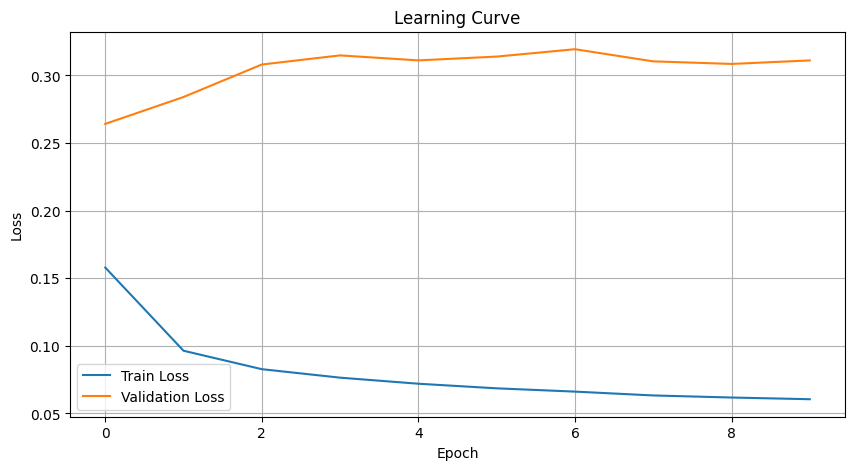

In [3]:
run_pipeline(config)

Loading model and scalers...
Loading unseen layouts from: ./data/testing_layouts/
Found 2 layout files.

[1/2] Predicting layout: F1_2024_F1_2024_Processed_Data.csv


[1/2]:   0%|          | 0/983 [00:00<?, ?it/s]

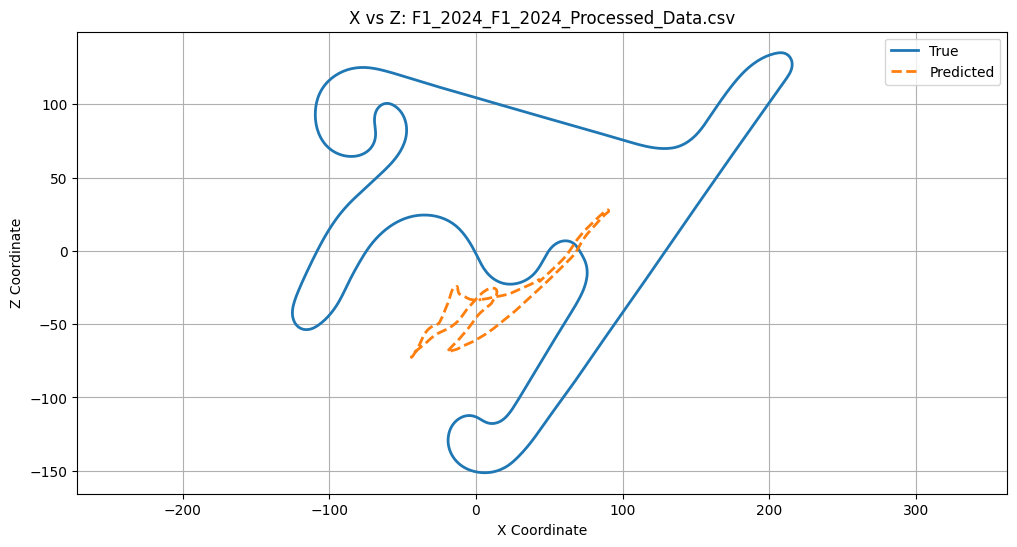


Per-Feature Accuracy (%):
------------------------------------------------------------
               x:  67.02% (layout-based)     0.00% (train-scale)
               y:   0.00% (layout-based)     0.00% (train-scale)
               z:  72.06% (layout-based)     0.00% (train-scale)
Mean X/Z spatial error: 149.61m, Max: 294.26m

[2/2] Predicting layout: ks_barcelona_layout_gp_Processed_Data.csv


[2/2]:   0%|          | 0/2928 [00:00<?, ?it/s]

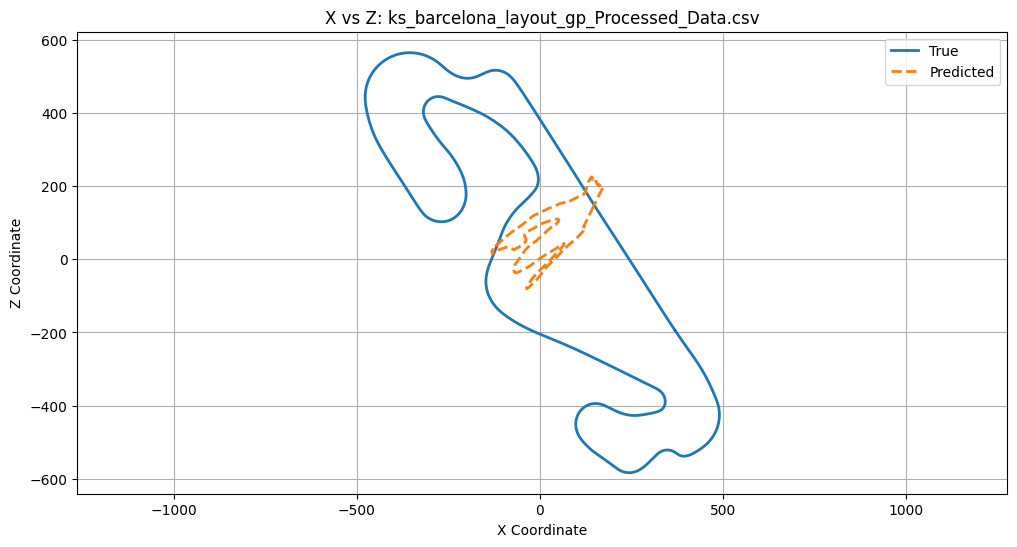


Per-Feature Accuracy (%):
------------------------------------------------------------
               x:  79.49% (layout-based)     0.00% (train-scale)
               y:  67.63% (layout-based)     0.00% (train-scale)
               z:  68.76% (layout-based)     0.00% (train-scale)
Mean X/Z spatial error: 430.45m, Max: 805.46m



In [4]:
# Inference for devlopment (includes acc)
run_inference(path=config["model_save_path"])

In [5]:
# From Inference File (From Coords or Image)
# get_racing_line(data_dir=config["test_data_path"], data_type="coords", model_path=config["model_save_path"])

In [6]:
# From Inference File (From Coords or Image)
# get_racing_line(data_dir=config["test_data_path"], data_type="image", model_path=config["model_save_path"])